# Import all libraries

In [118]:
import random
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

# Load MNIST dataset

In [119]:
dataset = torchvision.datasets.MNIST(root = 'datasets', train = True, download = True, transform=torchvision.transforms.ToTensor())

#### Get and visualize random individual

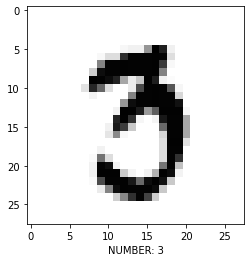

In [120]:
rand_individ = random.randint(0, 60_000)
img = dataset[rand_individ][0].view((28, 28))
ans = dataset[rand_individ][1]
plt.imshow(img, cmap='Greys')
plt.xlabel(f"NUMBER: {ans}")
pass

# Prepare and split data into train/test

In [121]:
split_ratio = 0.90
train_size = round(len(dataset) * split_ratio)
valid_size = len(dataset) - train_size

train, valid = torch.utils.data.random_split(dataset, [train_size, valid_size])

train_batch_loader = torch.utils.data.DataLoader2(train, batch_size=30)
valid_batch_loader = torch.utils.data.DataLoader2(valid, batch_size=30)

# Configure Model and hyper-parameters

In [127]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    # nn.Linear(4, 4),
    # nn.ReLU(),
    nn.Linear(10, 10),
    nn.Sigmoid()
)

epochs = 3
loss_func = nn.MSELoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=0.01)

history = []

# Train loop

In [123]:
for epoch in range(0, epochs):
    for batch in tqdm(train_batch_loader):
        features, ans = batch

        for i in range(0, train_batch_loader.batch_size):
            Y_pred = model(features[i].view(-1))

            ans_as_vect = torch.zeros(10)
            ans_as_vect[ans[i]] = 1

            loss = loss_func(Y_pred, ans_as_vect)
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()
            if i == 0: history.append(loss.data)

100%|██████████| 1800/1800 [00:39<00:00, 45.76it/s]


Mean Loss (last 100): 0.0767439752817154


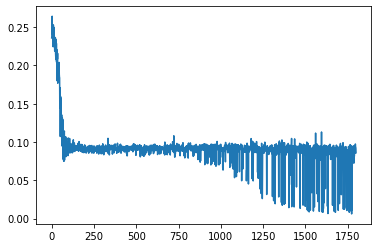

In [124]:
plt.plot(history)
print(f"Mean Loss (last 100): {sum(history[-100:]) / 100}")

# Validation

In [125]:
with torch.no_grad():
    answers = torch.zeros(10)
    predictions = torch.zeros(10)

    for batch in tqdm(valid_batch_loader):
        features, ans = batch

        for i in range(0, valid_batch_loader.batch_size):
            predictions = torch.vstack((predictions, model(features[i].view(-1))))

            ans_as_vect = torch.zeros(10)
            ans_as_vect[ans[i]] = 1

            answers = torch.vstack((answers, ans_as_vect))

    print(f"MSE: {mse(predictions.T, answers.T)}")


100%|██████████| 200/200 [00:00<00:00, 220.35it/s]

MSE: 0.08120217174291611
